In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Mean Absolute Percentage Error (MAPE) Plot

The following plot illustrates the Mean Absolute Percentage Error (MAPE) for different measurement conditions. The conditions include various combinations of planar and depth measurements using different methods. The MAPE values are represented as percentages.

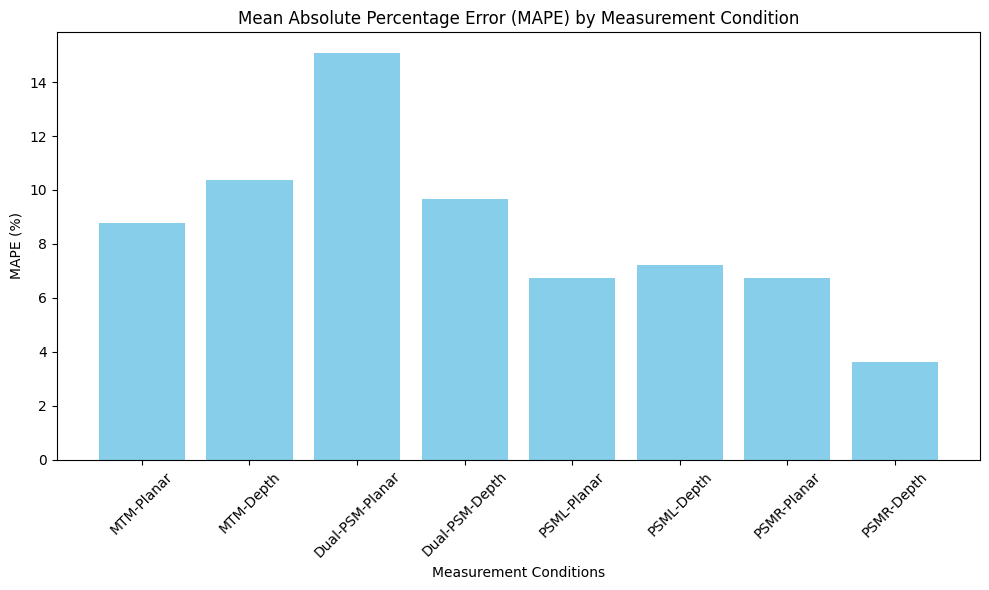

In [2]:
conditions = ['MTM-Planar', 'MTM-Depth', 'Dual-PSM-Planar', 'Dual-PSM-Depth', 'PSML-Planar', 'PSML-Depth', 'PSMR-Planar', 'PSMR-Depth']
mape_values = [8.78, 10.37, 15.09, 9.67, 6.73, 7.23, 6.75, 3.61]

plt.figure(figsize=(10, 6))
plt.bar(conditions, mape_values, color='skyblue')
plt.xlabel('Measurement Conditions')
plt.ylabel('MAPE (%)')
plt.title('Mean Absolute Percentage Error (MAPE) by Measurement Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bland-Altman Analysis

Bland-Altman analysis is a method to compare two measurement techniques. It involves plotting the differences between the two techniques against their averages. This type of plot helps to identify any systematic bias between the techniques and to visualize the agreement between them.

In [3]:
file_path = 'UserStudyData.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

In [4]:
# Ground truth for each condition
ground_truth_1 = 35.92
ground_truth_2 = 50.96

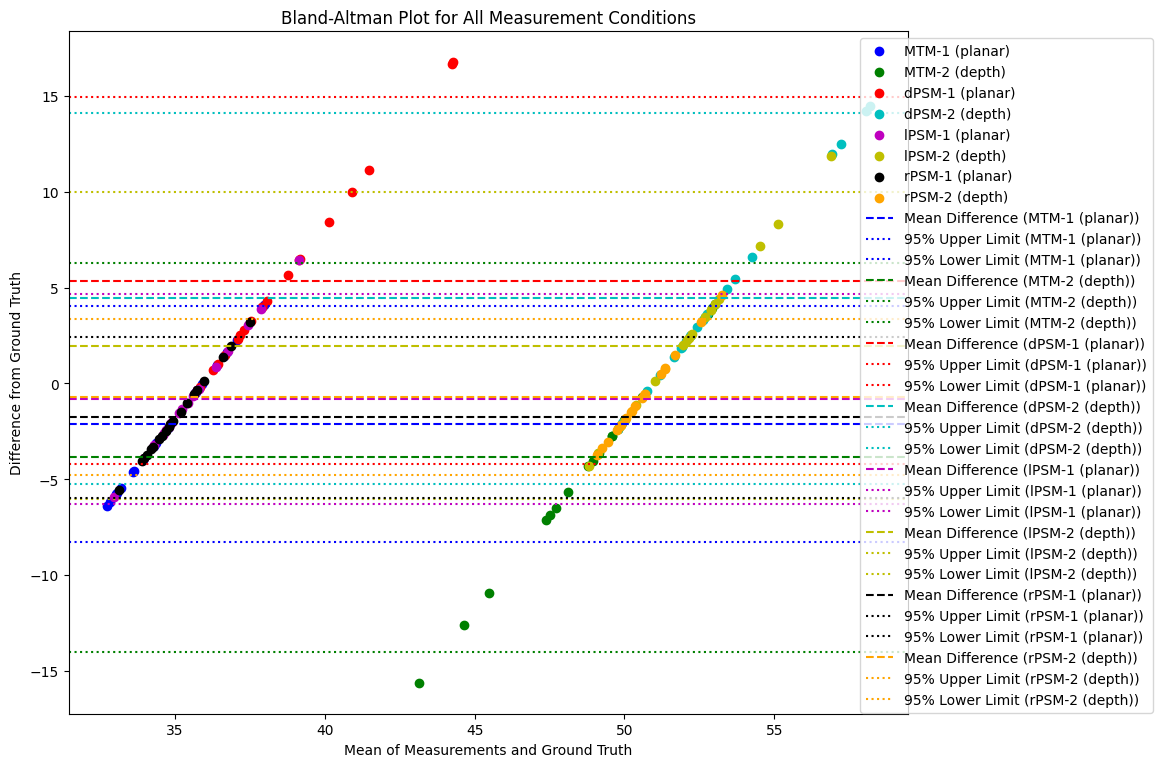

In [5]:
# Extract the data columns for each condition
mtm1 = df['MTM-1 (planar)']
mtm2 = df['MTM-2 (depth)']
dpsm1 = df['dPSM-1 (planar)']
dpsm2 = df['dPSM-2 (depth)']
lpsm1 = df['lPSM-1(planar)']
lpsm2 = df['lPSM-2 (depth)']
rpsm1 = df['rPSM-1(planar)']
rpsm2 = df['rPSM-2 (depth)']

# Calculate mean values and differences for each measurement
mean_values_1 = df['MTM-1 (planar)'].iloc[95:115].values
differences_1 = df['MTM-1 (planar)'].iloc[116:136].values
mean_values_2 = df['MTM-2 (depth)'].iloc[95:115].values
differences_2 = df['MTM-2 (depth)'].iloc[116:136].values
mean_values_3 = df['dPSM-1 (planar)'].iloc[95:115].values
differences_3 = df['dPSM-1 (planar)'].iloc[116:136].values
mean_values_4 = df['dPSM-2 (depth)'].iloc[95:115].values
differences_4 = df['dPSM-2 (depth)'].iloc[116:136].values
mean_values_5 = df['lPSM-1(planar)'].iloc[95:115].values
differences_5 = df['lPSM-1(planar)'].iloc[116:136].values
mean_values_6 = df['lPSM-2 (depth)'].iloc[95:115].values
differences_6 = df['lPSM-2 (depth)'].iloc[116:136].values
mean_values_7 = df['rPSM-1(planar)'].iloc[95:115].values
differences_7 = df['rPSM-1(planar)'].iloc[116:136].values
mean_values_8 = df['rPSM-2 (depth)'].iloc[95:115].values
differences_8 = df['rPSM-2 (depth)'].iloc[116:136].values

# Create the Bland-Altman plot
plt.figure(figsize=(12, 8))

# Plot each set of measurements
plt.scatter(mean_values_1, differences_1, color='b', label='MTM-1 (planar)')
plt.scatter(mean_values_2, differences_2, color='g', label='MTM-2 (depth)')
plt.scatter(mean_values_3, differences_3, color='r', label='dPSM-1 (planar)')
plt.scatter(mean_values_4, differences_4, color='c', label='dPSM-2 (depth)')
plt.scatter(mean_values_5, differences_5, color='m', label='lPSM-1 (planar)')
plt.scatter(mean_values_6, differences_6, color='y', label='lPSM-2 (depth)')
plt.scatter(mean_values_7, differences_7, color='k', label='rPSM-1 (planar)')
plt.scatter(mean_values_8, differences_8, color='orange', label='rPSM-2 (depth)')

# Add mean difference and limits for each condition
for mean_values, differences, color, label in zip(
    [mean_values_1, mean_values_2, mean_values_3, mean_values_4, mean_values_5, mean_values_6, mean_values_7, mean_values_8],
    [differences_1, differences_2, differences_3, differences_4, differences_5, differences_6, differences_7, differences_8],
    ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange'],
    ['MTM-1 (planar)', 'MTM-2 (depth)', 'dPSM-1 (planar)', 'dPSM-2 (depth)', 'lPSM-1 (planar)', 'lPSM-2 (depth)', 'rPSM-1 (planar)', 'rPSM-2 (depth)']
):
    mean_diff = differences.mean()
    std_diff = differences.std()
    upper_limit = mean_diff + 1.96 * std_diff
    lower_limit = mean_diff - 1.96 * std_diff

    plt.axhline(mean_diff, color=color, linestyle='--', label=f'Mean Difference ({label})')
    plt.axhline(upper_limit, color=color, linestyle=':', label=f'95% Upper Limit ({label})')
    plt.axhline(lower_limit, color=color, linestyle=':', label=f'95% Lower Limit ({label})')

plt.xlabel('Mean of Measurements and Ground Truth')
plt.ylabel('Difference from Ground Truth')
plt.title('Bland-Altman Plot for All Measurement Conditions')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()